In [1]:
import pandas as pd
import numpy as np

In [2]:
tweets = pd.read_csv("Tweet.csv")
tweets

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
...,...,...,...,...,...,...,...
3717959,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6
3717960,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1
3717961,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5
3717962,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1


In [4]:
companies = pd.read_csv("Company.csv")

In [5]:
company_tweet = pd.read_csv("Company_Tweet.csv")

In [9]:
aapl_tweet_ids = company_tweet[company_tweet['ticker_symbol'] == 'AAPL']
ids = aapl_tweet_ids['tweet_id'].tolist()
ids[0], len(ids)

(550803612197457920, 1425013)

In [11]:
aapl_tweets = tweets[tweets['tweet_id'].isin(ids)]
aapl_tweets

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
5,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
6,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
...,...,...,...,...,...,...,...
3717957,1212159254884433921,QuantWolfLine,1577836261,Imagine calling your broker-dealer and wanting...,1,0,1
3717958,1212159275637886976,GMGRIFF_79,1577836266,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",0,0,1
3717959,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6
3717962,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1


In [12]:
d_example = aapl_tweets.loc[0]['post_date']
d_example

1420070457

In [13]:
import datetime

In [15]:
datetime.datetime.fromtimestamp(d_example).isoformat()

'2014-12-31T17:00:57'

In [16]:
aapl_tweets['post_date'] = pd.to_datetime(aapl_tweets['post_date'].apply(lambda x: datetime.datetime.fromtimestamp(x).isoformat()))

/tmp/ipykernel_15002/258164601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_tweets['post_date'] = pd.to_datetime(aapl_tweets['post_date'].apply(lambda x: datetime.datetime.fromtimestamp(x).isoformat()))


In [86]:
mask = (aapl_tweets['post_date'] >= pd.to_datetime(1530496984, unit='s')) & (aapl_tweets['post_date'] <= pd.to_datetime(1538445784, unit='s'))

In [87]:
time_tweets = aapl_tweets[mask]

In [96]:
gb_date = time_tweets.groupby(time_tweets.post_date.dt.strftime('%m-%d'))
counts = gb_date.count()['tweet_id'].to_numpy()
c = gb_date.count()['tweet_id']
idx = list(gb_date.indices.keys())
len(idx)

93

In [89]:
m = c.rolling(15).mean()
s = c.rolling(15).std()

In [90]:
import matplotlib.pyplot as plt

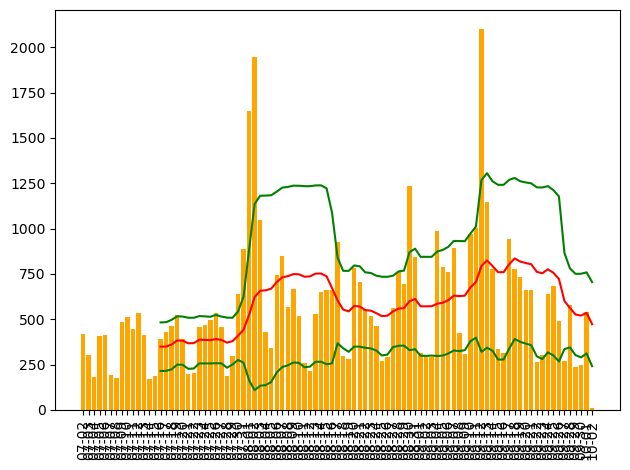

In [91]:
plt.xticks(rotation=90)
plt.bar(idx, counts, color='orange')
plt.plot(m,color='r')
plt.plot(m-s,color='g')
plt.plot(m+s,color='g')
plt.tight_layout()

In [92]:
apple_daily = pd.read_csv("./charts/APPLE1440.csv")
apple_daily

,date,time,open,high,low,close,unknown
0,2014-06-30,00:00,93.159,94.194,93.028,93.460,2799
1,2014-07-01,00:00,93.973,94.546,93.611,93.993,4787
2,2014-07-02,00:00,94.344,94.515,93.540,93.902,4476
3,2014-07-03,00:00,94.113,94.545,93.661,94.495,3454
4,2014-07-07,00:00,94.936,96.423,94.936,96.403,4638
...,...,...,...,...,...,...,...
1138,2019-01-28,00:00,156.250,156.490,153.650,155.920,62867
1139,2019-01-29,00:00,156.470,161.620,150.980,160.540,66595
1140,2019-01-30,00:00,161.680,166.110,160.220,165.660,70344
1141,2019-01-31,00:00,166.100,168.980,164.530,166.770,62821


In [102]:
d_mask = (apple_daily['date'] >= '2018-06-31') & (apple_daily['date'] <= '2018-09-31')
aapl = apple_daily[d_mask].sort_values(by='date')
aapl['date'] = pd.to_datetime(aapl['date'])
dates = aapl['date'].dt.strftime('%m-%d').tolist()

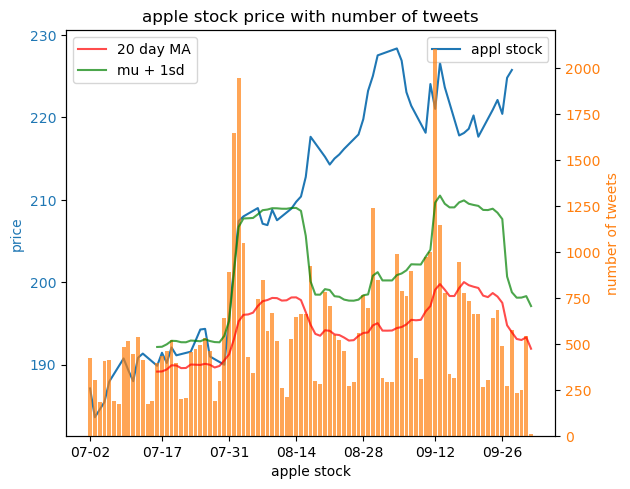

In [120]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('apple stock')
ax1.set_ylabel('price', color=color)
ax1.plot(dates, aapl['close'], color=color, label='appl stock')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('number of tweets', color=color)  # we already handled the x-label with ax1
ax2.bar(idx, counts, color=color, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(m,color='r', alpha=0.7, label='20 day MA')
ax2.plot(m+s,color='g', alpha=0.7, label='mu + 1sd')

plt.xticks(dates[::10], dates[::10], rotation=90)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend()
ax2.legend()
plt.title('apple stock price with number of tweets')

plt.show()